In [1]:
import numpy as np
import matplotlib.pyplot as plt
import mltools as ml

In [2]:
SEED = 0
np.random.seed(SEED)

# Problem 1

Setting up the data

In [3]:
# Data Loading
X = np.genfromtxt('data/X_train.txt', delimiter=None)
Y = np.genfromtxt('data/Y_train.txt', delimiter=None)
X,Y = ml.shuffleData(X,Y)

In [4]:
X.shape, Y.shape

((200000, 14), (200000,))

### 1.1
- Print the minimum, maximum, mean, and the variance of all of the features.

In [5]:
for i in range(X.shape[1]):
        feature, data = i, X[:, i]
        print(f'feature #{feature}, feature shape = {data.shape}')
        f_min, f_max, f_mean, f_var = np.min(data), np.max(data), np.mean(data), np.var(data)
        print(f'min = {f_min}, max = {f_max}, mean = {f_mean}, variance = {f_var}s')

feature #0, feature shape = (200000,)
min = 193.0, max = 253.0, mean = 241.79722040000001, variance = 82.69456190782384s
feature #1, feature shape = (200000,)
min = 190.0, max = 250.5, mean = 228.22826004999996, variance = 90.95739454607398s
feature #2, feature shape = (200000,)
min = 214.97, max = 252.5, mean = 241.79629755000002, variance = 35.72557959436399s
feature #3, feature shape = (200000,)
min = 205.42, max = 252.5, mean = 233.64929865000005, variance = 95.26085391860819s
feature #4, feature shape = (200000,)
min = 10.0, max = 17130.0, mean = 2867.97959, variance = 10619418.044443434s
feature #5, feature shape = (200000,)
min = 0.0, max = 12338.0, mean = 884.073295, variance = 3257029.8456128417s
feature #6, feature shape = (200000,)
min = 0.0, max = 9238.0, mean = 173.553355, variance = 740656.133623244s
feature #7, feature shape = (200000,)
min = 0.0, max = 35.796, mean = 3.0471957174499997, variance = 7.422442772290731s
feature #8, feature shape = (200000,)
min = 0.68146, m

### 1.2
- Split the dataset, and rescale each into training and validation, as:

In [6]:
Xtr, Xva, Ytr, Yva = ml.splitData(X, Y)
Xt, Yt = Xtr[:], Ytr[:] # subsample for efficiency (you can go higher)
XtS, params = ml.rescale(Xt) # Normalize the features
XvS, _ = ml.rescale(Xva, params) # Normalize the features

In [7]:
for i in range(XtS.shape[1]):
        feature, data = i, XtS[:, i]
        print(f'feature #{feature}, feature shape = {data.shape}')
        f_min, f_max, f_mean, f_var = np.min(data), np.max(data), np.mean(data), np.var(data)
        print(f'min = {f_min}, max = {f_max}, mean = {f_mean}, variance = {f_var}s')

feature #0, feature shape = (160000,)
min = -5.356424108046463, max = 1.231390995438887, mean = -1.2448972963596815e-13, variance = 1.0000000000002056s
feature #1, feature shape = (160000,)
min = -4.006355734220892, max = 2.3350563187306888, mean = -4.5786485713961156e-15, variance = 0.9999999999998604s
feature #2, feature shape = (160000,)
min = -4.489482476053577, max = 1.792460796550452, mean = 9.803199141344975e-13, variance = 1.000000000000054s
feature #3, feature shape = (160000,)
min = -2.8901512827783282, max = 1.9304937389818781, mean = 1.9394041927967008e-13, variance = 1.0000000000001534s
feature #4, feature shape = (160000,)
min = -0.875327460869565, max = 4.374786677447262, mean = 5.409006575973763e-17, variance = 0.9999999999999709s
feature #5, feature shape = (160000,)
min = -0.489731761445261, max = 6.346198659708712, mean = -3.6681768733615175e-17, variance = 0.9999999999993734s
feature #6, feature shape = (160000,)
min = -0.20112040756332397, max = 10.508802081810787,

# Problem 2

## Decision Trees

### 2.1
- Keeping minParent=2 and minLeaf=1, vary maxDepth to a range of your choosing, and plot the training and validation AUC. 

In [8]:
def plot_auc(param_range, train_auc, test_auc):
    fig, ax = plt.subplots()
    # x-axis
    ax.plot(param_range, train_auc, label="Training score", color="blue")
    # y-axis
    ax.plot(param_range, test_auc, label="Validation score", color="red")
 
    ax.set_title("Training and Validation Scores")
    ax.set_xlabel("Max Depth")
    ax.set_ylabel("Accuracy Score")
    ax.set_xticks(param_range)

    ax.legend(loc="best")
    plt.show()

In [9]:
def plot_hyperparameters(x_param_range, x1,
    x1_label, x2, x2_label, y1, y2, title, xlabel, ylabel):
    
    fig, ax = plt.subplots()
    # x1 = varying maxDepths, y1 = num of nodes
    ax.plot(x1, y1, label=x1_label, color="blue")
    # x2 = varying maxDepths at different minLeaf, y2 = num of nodes
    ax.plot(x2, y2, label=x2_label, color="red")

    ax.set_title(title)
    ax.set_xlabel(xlabel)
    ax.set_xticks(x_param_range)
    ax.set_ylabel(ylabel)

    ax.legend(loc="best")
    plt.show()


In [10]:
# 2.1 decision tree hyperparameters
minParent = 2
minLeaf = 1
max_depths = np.arange(5, 30, 5)

In [11]:
max_depths

array([ 5, 10, 15, 20, 25])

In [12]:
training_auc_scores = []
validation_auc_scores = []
num_nodes_per_model = []
for maxDepth in max_depths:
        learner = ml.dtree.treeClassify(XtS, Yt, maxDepth=maxDepth, minParent=minParent, minLeaf=minLeaf)
        # get scores
        training_auc = learner.auc(XtS, Ytr)
        validation_auc = learner.auc(XvS, Yva)
        # get node count
        num_nodes = learner.sz
        print(f'{maxDepth=}, {minParent=}, {minLeaf=}, {num_nodes=}, {training_auc=}, {validation_auc=}')
        # append scores to lists
        training_auc_scores.append(training_auc)
        validation_auc_scores.append(validation_auc)
        num_nodes_per_model.append(num_nodes)

maxDepth=5, minParent=2, minLeaf=1, num_nodes=63, training_auc=0.6802470794015942, validation_auc=0.6726391660514841
maxDepth=10, minParent=2, minLeaf=1, num_nodes=1889, training_auc=0.733116364053804, validation_auc=0.7069586634934072
maxDepth=15, minParent=2, minLeaf=1, num_nodes=19823, training_auc=0.8152766562845822, validation_auc=0.7288880631284261
maxDepth=20, minParent=2, minLeaf=1, num_nodes=71133, training_auc=0.8938157114505115, validation_auc=0.7302385584015104
maxDepth=25, minParent=2, minLeaf=1, num_nodes=137447, training_auc=0.9431615573687917, validation_auc=0.719242576669533


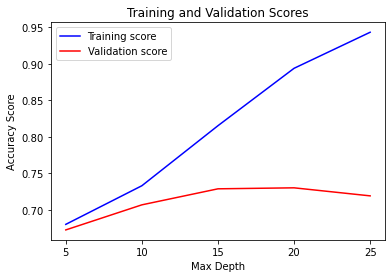

In [13]:
plot_auc(max_depths, training_auc_scores, validation_auc_scores)

### 2.2
- Plot the number of nodes in the tree as maxDepth is varied (using learner.sz).
- Plot another line in this plot by increasing either minParent or minLeaf (choose either, and by how much).

In [14]:
# same code as above except using a different minLeaf value of 4
minLeaf = 4
training_auc_scores_2 = []
validation_auc_scores_2 = []
num_nodes_per_model_2 = []
for maxDepth in max_depths:
        learner = ml.dtree.treeClassify(XtS, Yt, maxDepth=maxDepth, minParent=minParent, minLeaf=minLeaf)
        # get scores
        training_auc = learner.auc(XtS, Ytr)
        validation_auc = learner.auc(XvS, Yva)
        # get node count
        num_nodes = learner.sz
        print(f'{maxDepth=}, {minParent=}, {minLeaf=}, {num_nodes=}, {training_auc=}, {validation_auc=}')
        # append scores to lists
        training_auc_scores_2.append(training_auc)
        validation_auc_scores_2.append(validation_auc)
        num_nodes_per_model_2.append(num_nodes)

maxDepth=5, minParent=2, minLeaf=4, num_nodes=63, training_auc=0.6802470794015942, validation_auc=0.6726391660514841
maxDepth=10, minParent=2, minLeaf=4, num_nodes=1661, training_auc=0.7326342123229652, validation_auc=0.7070601407171536
maxDepth=15, minParent=2, minLeaf=4, num_nodes=11811, training_auc=0.8127309980704159, validation_auc=0.7300873341318402
maxDepth=20, minParent=2, minLeaf=4, num_nodes=31129, training_auc=0.883926101008259, validation_auc=0.7346448520321841
maxDepth=25, minParent=2, minLeaf=4, num_nodes=48315, training_auc=0.9224596582613404, validation_auc=0.7321330055595652


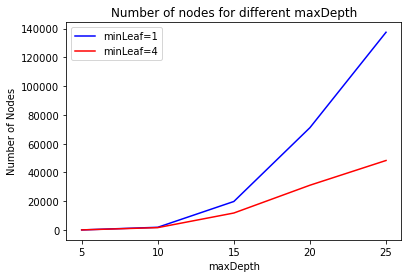

In [15]:
plot_hyperparameters(max_depths, x1=max_depths, \
        x1_label="minLeaf=1", x2=max_depths, x2_label="minLeaf=4",\
        y1=num_nodes_per_model, y2=num_nodes_per_model_2,\
        title="Number of nodes for different maxDepth",\
        xlabel="maxDepth", ylabel="Number of Nodes")

### 2.3
- Set maxDepth to a fixed value, and plot the training and validation performance of the other two hyper- parameters in an appropriate range, using the same 2D plot we used for nearest-neighbors. Show the plots, and recommend a choice for minParent and minLeaf based on these results.

In [16]:
# hyperparameters
maxDepth = 10
minParents = np.arange(2,10,1)
minLeaves = np.arange(1,10,1)

In [17]:
tr_auc = np.zeros((len(minParents),len(minLeaves)))
va_auc = np.zeros((len(minParents),len(minLeaves)))
for i,p in enumerate(minParents):
  for j,l in enumerate(minLeaves):
    learner = ml.dtree.treeClassify(XtS, Yt, maxDepth=maxDepth, minParent=minParent, minLeaf=minLeaf)
    tr_auc[i][j] = learner.auc(XtS, Ytr) # train learner using k and a
    va_auc[i][j] = learner.auc(XvS, Yva)

<ipython-input-18-359d135a8a42>:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(minParents)
<ipython-input-18-359d135a8a42>:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(minLeaves)


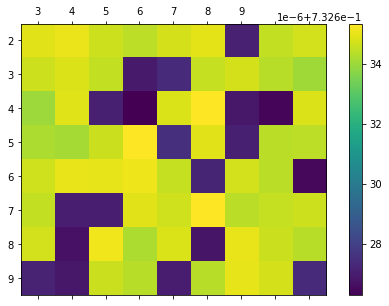

In [18]:
# Plotting training matrix
f, ax = plt.subplots(1, 1, figsize=(8, 5))
cax = ax.matshow(tr_auc, interpolation='nearest')
f.colorbar(cax)
ax.set_xticklabels(minParents)
ax.set_yticklabels(minLeaves)
plt.show()

<ipython-input-19-2e7ccf4cde4b>:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(minParents)
<ipython-input-19-2e7ccf4cde4b>:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(minLeaves)


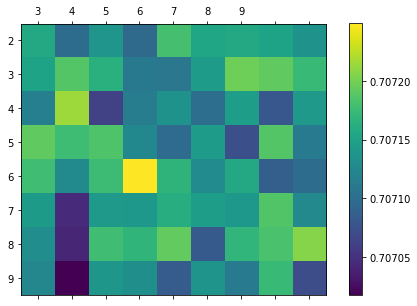

In [19]:
# Plotting validation matrix
f, ax = plt.subplots(1, 1, figsize=(8, 5))
cax = ax.matshow(va_auc, interpolation='nearest')
f.colorbar(cax)
ax.set_xticklabels(minParents)
ax.set_yticklabels(minLeaves)
plt.show()

# Problem 3

In [1]:
import numpy as np
from datetime import datetime 

import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import DataLoader

from torchvision import datasets, transforms

%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
# define transforms
transforms = transforms.Compose([transforms.Resize((32, 32)),
                                 transforms.ToTensor()])

# download and create datasets
train_dataset = datasets.MNIST(root='mnist_data', 
                               train=True, 
                               transform=transforms,
                               download=True)

valid_dataset = datasets.MNIST(root='mnist_data', 
                               train=False, 
                               transform=transforms)

## 3.1.1
- Visualization of the MNIST dataset. Visualize the first image and its label from the training dataset. It should be an image of handwritten '5'.

In [3]:
train_dataset.targets.size(), valid_dataset.targets.size()

(torch.Size([60000]), torch.Size([10000]))

In [4]:
train_dataset[0][0].size(), train_dataset[0][1]

(torch.Size([1, 32, 32]), 5)

Text(10, -2, 'The label is 5')

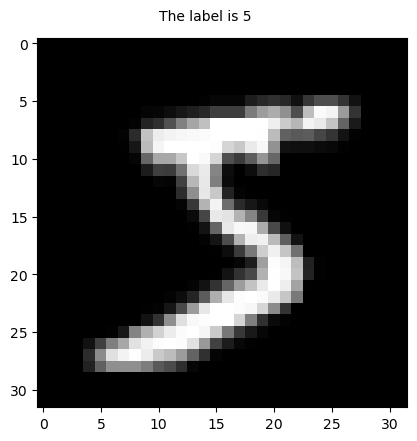

In [5]:
plt.imshow(train_dataset[0][0].reshape(32,32), cmap='gray')
plt.text(10, -2, 'The label is ' + str(train_dataset[0][1]))

In [6]:
# hyper parameters
RANDOM_SEED = 42
LEARNING_RATE = 0.001
BATCH_SIZE = 32
N_EPOCHS = 15

IMG_SIZE = 32
N_CLASSES = 10

## 3.1.2
- Create dataloaders for training and test sets

In [7]:
# define the data loaders
train_loader = DataLoader(dataset=train_dataset, 
                          batch_size=BATCH_SIZE, 
                          shuffle=True)

valid_loader = DataLoader(dataset=valid_dataset, 
                          batch_size=BATCH_SIZE, 
                          shuffle=True)

## 3.1.3
- Implement the function for training one epoch, train()

In [8]:

def train(train_loader, model, criterion, optimizer):
    '''
    Train one epoch.
    '''

    model.train()
    running_loss = 0
    
    for X, y_true in train_loader:

        # reset gradient to 0
        optimizer.zero_grad()

        # Forward pass
        y_hat, _ = model(X) 
        loss = criterion(y_hat, y_true)
        running_loss += loss.item() * X.size(0)

        # Backward pass
        # backpropagate gradient
        loss.backward()

        optimizer.step()  # update the parameters in the model
        
    epoch_loss = running_loss / len(train_loader.dataset)
    return model, optimizer, epoch_loss

## 3.1.4
- Implement the function for validating the model, validate()

In [9]:
def validate(valid_loader, model, criterion):
    '''
    Function for the validation step of the training loop.
    Returns the model and the loss on the test set.
    '''
   
    #model......
    model.train()
    running_loss = 0
    
    for X, y_true in valid_loader:

        # Forward pass and record loss
        y_hat, _ = model(X) 
        loss = criterion(y_hat, y_true)        
    
        running_loss += loss.item() * X.size(0)

    epoch_loss = running_loss / len(valid_loader.dataset)
        
    return model, epoch_loss

In [10]:
def training_loop(model, criterion, optimizer, train_loader, valid_loader, epochs, print_every=1):
    '''
    Function defining the entire training loop
    '''
    
    # set objects for storing metrics
    best_loss = 1e10
    train_losses = []
    valid_losses = []
    train_accs = []
    valid_accs = []
 
    # Train model
    for epoch in range(0, epochs):

        # training
        model, optimizer, train_loss = train(train_loader, model, criterion, optimizer)
        train_losses.append(train_loss)

        # validation
        with torch.no_grad():
            model, valid_loss = validate(valid_loader, model, criterion)
            valid_losses.append(valid_loss)

        if epoch % print_every == (print_every - 1):
            
            train_acc = get_accuracy(model, train_loader,)
            train_accs.append(train_acc)
            valid_acc = get_accuracy(model, valid_loader)
            valid_accs.append(valid_acc)
                
            print(f'{datetime.now().time().replace(microsecond=0)} '
                  f'Epoch: {epoch}\t'
                  f'Train loss: {train_loss:.4f}\t'
                  f'Valid loss: {valid_loss:.4f}\t'
                  f'Train accuracy: {100 * train_acc:.2f}\t'
                  f'Valid accuracy: {100 * valid_acc:.2f}')
    
    performance = {
        'train_losses':train_losses,
        'valid_losses': valid_losses,
        'train_acc': train_accs,
        'valid_acc':valid_accs
    }
    
    return model, optimizer, performance

## 3.1.5
- Implement the function for calculating the prediction accuracy, get_accuracy()

In [11]:
def get_accuracy(model, data_loader):
    '''
    Function for computing the accuracy of the predictions over the entire data_loader
    '''
    
    correct_pred = 0 
    n = 0
    
    with torch.no_grad():
        # Sets the module in evaluation mode. Equivalent to self.train(False)
        model.eval()
        for X, y_true in data_loader:

            # return probabilities of different class labels
            _, y_prob = model(X)
            # predicted labels are the labels with the highest probability
            _, predicted_labels = torch.max(y_prob, dim=1)

            n += y_true.size(0)
            correct_pred += (predicted_labels == y_true).sum()

    return correct_pred.float() / n


    
def plot_performance(performance):
    '''
    Function for plotting training and validation losses
    '''
    
    # temporarily change the style of the plots to seaborn 
    plt.style.use('seaborn')

    fig, ax = plt.subplots(1, 2, figsize = (16, 4.5))
    for key, value in performance.items():
        if 'loss' in key:
            ax[0].plot(value, label=key) 
        else:
            ax[1].plot(value, label=key) 
    ax[0].set(title="Loss  over epochs", 
            xlabel='Epoch',
            ylabel='Loss')
    ax[1].set(title="accuracy over epochs", 
            xlabel='Epoch',
            ylabel='Loss')
    ax[0].legend()
    ax[1].legend()
    plt.show()
    
    # change the plot style to default
    plt.style.use('default')    

## 3.2.1
- complete the class definition of the LeNet model

In [96]:
class LeNet5(nn.Module):

    def __init__(self, n_classes):
        super(LeNet5, self).__init__()
        
        # hidden layers of LeNet5 NN
        self.feature_transformer = nn.Sequential(   
            # first convolutional layer - output 6 channels
            nn.Conv2d(in_channels= 1, out_channels=6, kernel_size=(5,5), stride=1),
            # tanh activation function on output of first layer
            nn.Tanh(),
            # Applies a 2D average pooling
            nn.AvgPool2d(kernel_size=(2,2)),
            # second convolutional layer - output 16 channels
            nn.Conv2d(in_channels=6, out_channels=16, kernel_size=(5,5), stride=1),
            # tanh activation function on output of second layer
            nn.Tanh(),
            # Applies a 2D average pooling
            nn.AvgPool2d(kernel_size=(2,2)),
            # third convolutional layer - output 120 channels
            nn.Conv2d(in_channels=16, out_channels=120, kernel_size=(5,5), stride=1),
            # tanh activation function on output of third layer
            nn.Tanh()
        )

        self.classifier = nn.Sequential(
            # 1st Fully Connected layer
            # input is 120 features/channels from third convolutional layer - output is 84 features
            nn.Linear(in_features=120, out_features=84),
            # tanh activation function on output of 1st Fully Connected layer
            nn.Tanh(),
            # 2nd Fully Connected layer
            # input is 84 features/channels - output is n_classes (10) features representing the 10 different classes
            nn.Linear(in_features=84, out_features=n_classes)
        )


    def forward(self, x):
        # transform images via hidden layers of LeNet5 model
        transformed_x_features = self.feature_transformer(x)
        # flatten transformed features into a vector
        x = torch.flatten(transformed_x_features, start_dim=1)
        logits = self.classifier(x)
        probs = F.softmax(logits, dim=1)
        return logits, probs

## 3.2.2
- Complete the codes inside class MLP. The construction function takes an argument layers. layers[0] is the input dimension, layers[-1] is the number of classes, while layers[1:-1] are the numbers of nodes of hidden layers. Each hidden layer should be followed by a non-linear activation function. In this homework, we use tanh.

In [21]:
class MLP(nn.Module):

    def __init__(self, layers):
        super(MLP, self).__init__()
 
        self.input_dims = layers[0]
        self.hidden_units = layers[1:-1]
        self.n_classes = layers[-1]
        
        feature_transformer = []
        
        # input layer
        feature_transformer.append(nn.Linear(in_features=self.input_dims, out_features=layers[1]))
        feature_transformer.append(nn.Tanh())
        # hidden layers
        for i, n_nodes in enumerate(self.hidden_units[:-1]):
            feature_transformer.append(nn.Linear(in_features=n_nodes, out_features=self.hidden_units[i+1]))
            feature_transformer.append(nn.Tanh())
        
        feature_transformer = tuple(feature_transformer)
        # * to extract the tuple component-wise
        self.feature_transformer = nn.Sequential(*feature_transformer)

        # classifier takes in the output of the hidden layers
        self.classifier = nn.Sequential(
            nn.Linear(in_features=self.hidden_units[-1], out_features=self.n_classes)
        )

    def forward(self, x):
        # reshape input
        x = x.view(-1, self.input_dims)
        #transform images via hidden layers of multilayer perceptron model
        transformed_x_features = self.feature_transformer(x)
        # flatten transformed features into a vector to be able to pass into classifier
        x = torch.flatten(transformed_x_features, start_dim=1)
        logits = self.classifier(x)
        # calculate probabilities for each n_class using softmax
        probs = F.softmax(logits, dim=1)
        return logits, probs

## 3.3.1
- Train the LeNet, by calling training_loop() . Plot and report the performance.

In [98]:
torch.manual_seed(RANDOM_SEED)

model = LeNet5(N_CLASSES)
optimizer = torch.optim.Adam(model.parameters(), lr=LEARNING_RATE)
criterion = nn.CrossEntropyLoss()

18:37:03 Epoch: 0	Train loss: 0.2290	Valid loss: 0.1020	Train accuracy: 96.84	Valid accuracy: 96.81
18:37:35 Epoch: 1	Train loss: 0.0766	Valid loss: 0.0681	Train accuracy: 98.20	Valid accuracy: 97.95
18:38:14 Epoch: 2	Train loss: 0.0538	Valid loss: 0.0573	Train accuracy: 98.59	Valid accuracy: 98.25
18:38:47 Epoch: 3	Train loss: 0.0432	Valid loss: 0.0473	Train accuracy: 99.04	Valid accuracy: 98.53
18:39:20 Epoch: 4	Train loss: 0.0347	Valid loss: 0.0533	Train accuracy: 99.08	Valid accuracy: 98.26
18:39:53 Epoch: 5	Train loss: 0.0313	Valid loss: 0.0486	Train accuracy: 99.14	Valid accuracy: 98.52
18:40:23 Epoch: 6	Train loss: 0.0263	Valid loss: 0.0463	Train accuracy: 99.41	Valid accuracy: 98.69
18:40:52 Epoch: 7	Train loss: 0.0226	Valid loss: 0.0411	Train accuracy: 99.54	Valid accuracy: 98.68
18:41:22 Epoch: 8	Train loss: 0.0194	Valid loss: 0.0457	Train accuracy: 99.32	Valid accuracy: 98.67
18:41:51 Epoch: 9	Train loss: 0.0179	Valid loss: 0.0393	Train accuracy: 99.69	Valid accuracy: 98.75


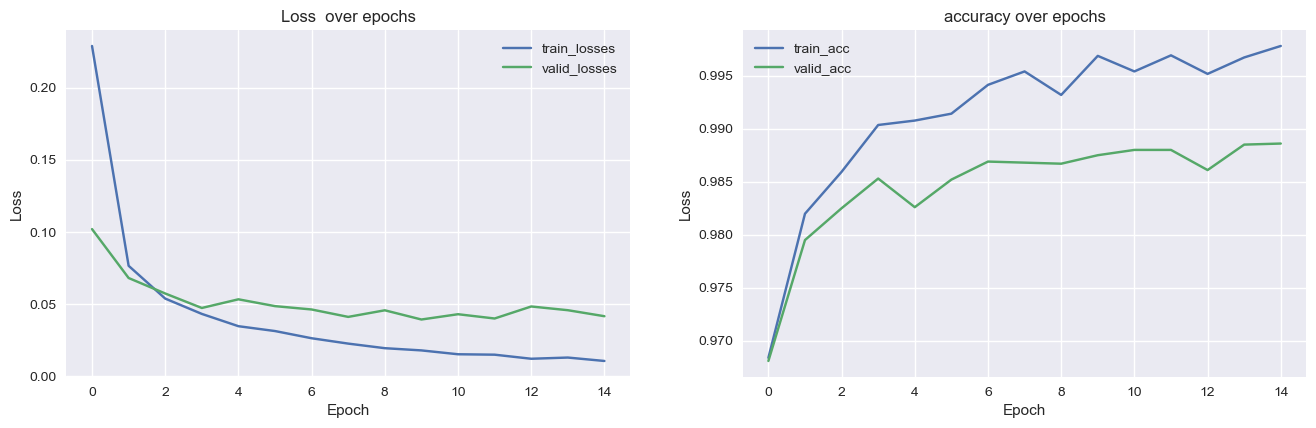

In [99]:
model, optimizer, performance_1 = training_loop(model, criterion, optimizer, train_loader, valid_loader, N_EPOCHS)
plot_performance(performance_1)

In [26]:
def count_parameters(model):
    total_params = 0
    for name, parameter in model.named_parameters():
        if not parameter.requires_grad: 
            continue
        param = parameter.numel()
        total_params+=param
    print(f"Total Trainable Params: {total_params}")
    return total_params

### 3.4.1
- What is the number of trainable parameters of LeNet?

In [102]:
LeNet5_parameter_cnt = count_parameters(model)
LeNet5_parameter_cnt

Total Trainable Params: 61706


61706

## 3.3.2
- Train the MLP with hidder layers of [256, 64, 16]. Plot and report its performance.

In [22]:
torch.manual_seed(RANDOM_SEED)
layers = [1024, 256, 64, 16, N_CLASSES]
model = MLP(layers)
print(model)
optimizer = torch.optim.Adam(model.parameters(), lr=LEARNING_RATE)
criterion = nn.CrossEntropyLoss()

MLP(
  (feature_transformer): Sequential(
    (0): Linear(in_features=1024, out_features=256, bias=True)
    (1): Tanh()
    (2): Linear(in_features=256, out_features=64, bias=True)
    (3): Tanh()
    (4): Linear(in_features=64, out_features=16, bias=True)
    (5): Tanh()
  )
  (classifier): Sequential(
    (0): Linear(in_features=16, out_features=10, bias=True)
  )
)


In [23]:
model, optimizer, performance_2 = training_loop(model, criterion, optimizer, train_loader, valid_loader, N_EPOCHS)

15:24:48 Epoch: 0	Train loss: 0.3575	Valid loss: 0.1636	Train accuracy: 95.61	Valid accuracy: 95.23
15:25:13 Epoch: 1	Train loss: 0.1311	Valid loss: 0.1300	Train accuracy: 96.74	Valid accuracy: 96.19
15:25:38 Epoch: 2	Train loss: 0.0921	Valid loss: 0.1026	Train accuracy: 98.02	Valid accuracy: 97.05
15:26:02 Epoch: 3	Train loss: 0.0721	Valid loss: 0.0923	Train accuracy: 98.21	Valid accuracy: 97.14
15:26:27 Epoch: 4	Train loss: 0.0607	Valid loss: 0.0807	Train accuracy: 98.65	Valid accuracy: 97.46
15:26:53 Epoch: 5	Train loss: 0.0490	Valid loss: 0.0820	Train accuracy: 98.81	Valid accuracy: 97.56
15:27:17 Epoch: 6	Train loss: 0.0442	Valid loss: 0.0842	Train accuracy: 98.98	Valid accuracy: 97.55
15:27:38 Epoch: 7	Train loss: 0.0370	Valid loss: 0.0755	Train accuracy: 99.17	Valid accuracy: 97.93
15:28:01 Epoch: 8	Train loss: 0.0334	Valid loss: 0.0816	Train accuracy: 99.21	Valid accuracy: 97.65
15:28:22 Epoch: 9	Train loss: 0.0315	Valid loss: 0.0859	Train accuracy: 99.15	Valid accuracy: 97.61


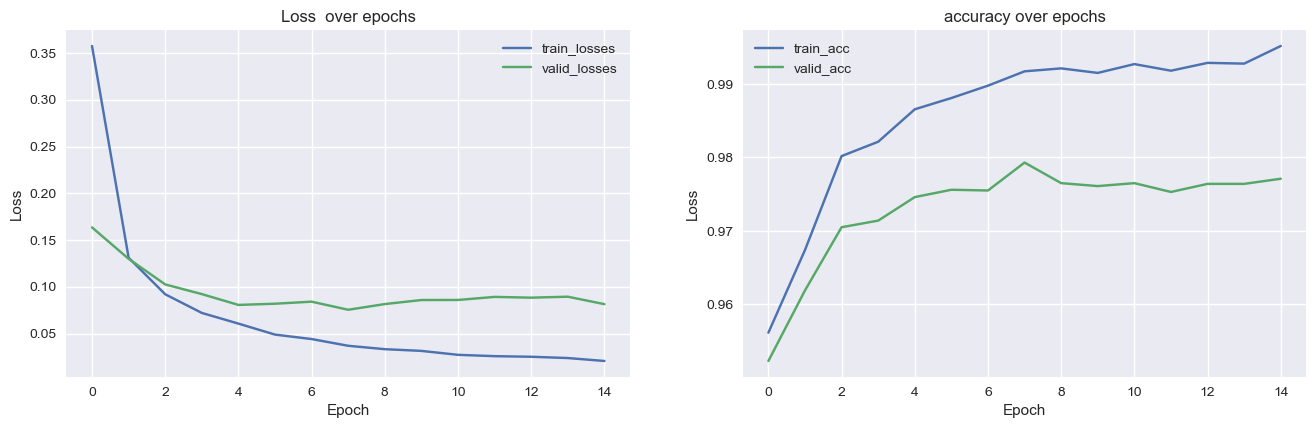

In [24]:
plot_performance(performance_2)

### 3.4.2
- What is the number of trainable parameters of MLP?

In [27]:
MLP_parameter_cnt = count_parameters(model)
MLP_parameter_cnt

Total Trainable Params: 280058


280058

### 3.4.3
- Which model has better performance in terms of prediction accuracy on the test data? Give a reason why this model works better than the other.

The LeNet5 model has better prediction accuracy as it has a 98.86% validation accuracy after convergence, meanwhile the Multi-Layer Perceptron has a 97.64% validation accuracy. The LeNet5 has better prediction accuracy because of its archiecture and design. The kernels within the convolutional layers of the LeNet5 model allows the neural network to learn latent patterns of images in blocks (kernels) of images. Additionally, the average pooling helps the LeNet5 achieve translational invariance. The MLP does not gain as much insight on the bigger picture latent patterns since it does not have a kernel. Another notable difference is the MLP has a lot more trainable parameters, 280,058, compared to the LeNet5, 61,706. Having far less parameters makes the LeNet5 model more scalable and ultimately more practical.